In [1]:
# to deactivate interactive poltting
# comment the following line
%matplotlib notebook
# Beam3d contains routines for importing mesh, calculating K and f, and plotting
from Beam3D import *

In [2]:
# there are two meshes for the Beam
# file name               | #nodes | #cells
# Beam.clmax10.clmin06.vtk| 303    | 912
# Beam.clmax05.clmin04.vtk| 723    | 2462
nodes,cells=read_mesh("Beam.clmax10.clmin06.vtk")

load mesh from Beam.clmax10.clmin06.vtk: 303 nodes, 912 cells


In [3]:
# there are some unused nodes exported from gmsh which wasted me at least 8 hours
# so we need to delete these points
nodes,cells=purge_mesh(nodes,cells)

point not used: {4, 6}
len(nodes): 303, ax: 301
point not used after purging: set()


<IPython.core.display.Javascript object>


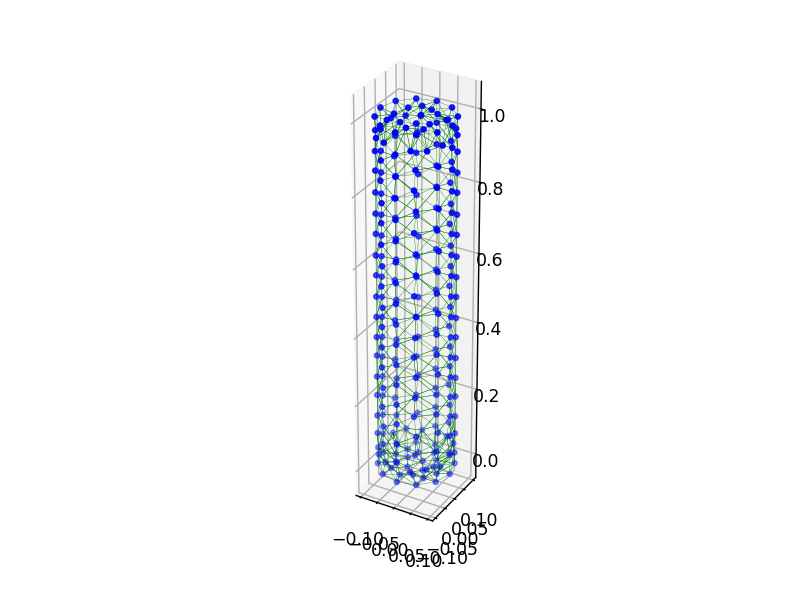

In [4]:
# let's have a look at our lovely stick
plot_tri_mesh(nodes,cells);

In [5]:
# let's have a look at the data structure
print("nodes:\n%s"%(nodes))
print("cells:\n%s"%(cells))

nodes:
[[ 1.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e-01  0.00000000e+00]
 [-1.00000000e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e-01  0.00000000e+00]
 [ 1.00000000e-01  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e-01  1.00000000e+00]
 [-1.00000000e-01  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00 -1.00000000e-01  1.00000000e+00]
 [ 8.66025403e-02  5.00000001e-02  0.00000000e+00]
 [ 4.99999999e-02  8.66025405e-02  0.00000000e+00]
 [-5.00000001e-02  8.66025403e-02  0.00000000e+00]
 [-8.66025405e-02  4.99999999e-02  0.00000000e+00]
 [-8.66025403e-02 -5.00000001e-02  0.00000000e+00]
 [-4.99999999e-02 -8.66025405e-02  0.00000000e+00]
 [ 5.00000001e-02 -8.66025403e-02  0.00000000e+00]
 [ 8.66025405e-02 -4.99999999e-02  0.00000000e+00]
 [ 8.66025403e-02  5.00000001e-02  1.00000000e+00]
 [ 4.99999999e-02  8.66025405e-02  1.00000000e+00]
 [-5.00000001e-02  8.66025403e-02  1.00000000e+00]
 [-8.66025405e-02  4.999

In [6]:
# data from the wikipedia， for Aluminium
E = 68000 # in MPa
nv = 0.32
F = np.array([[5.],[0],[0]]) # in Million Newton
# this two main functions are in the file `Beam3D.py`
K = gen_K(nodes,cells,E,nv)
f = gen_f(nodes,cells,F=F)

generating K matrix


100%|██████████| 912/912 [00:01<00:00, 772.18it/s]

gnerating f vector


In [7]:
# the minimal z greater than 0
# the 0.0389 in output helps you set the threshold for selecting bottom off
z_nodes=list(set(nodes[:,2]))
z_nodes.sort()
print(z_nodes[0:3])

[0.0, 0.03890822187627025, 0.04242144740818845]


In [8]:
# nonenode stands for "non-essential boundary condition nodes"
nonenode = np.where(nodes[:,2]>0.01)[0] # the 0.01 should smaller than 0.0389 in the above cell
print("number of non-essential boundary condition nodes: %d"%(len(nonenode)))

# index of nonenode
noneidx = np.zeros(3*len(nonenode),dtype='int')
noneidx[::3] = 3*nonenode
noneidx[1::3] = 3*nonenode+1
noneidx[2::3] = 3*nonenode+2

number of non-essential boundary condition nodes: 273


In [9]:
# select the true variables out
K22 = K[:,noneidx][noneidx,:]
print('K22 matrix generated with rank: %d'%(np.linalg.matrix_rank(K22)))
f2 = f[noneidx]
d2 = np.linalg.solve(K22, f2)
d = np.zeros((len(nodes) * 3, 1))
d[noneidx] = d2

K22 matrix generated with rank: 819


<IPython.core.display.Javascript object>


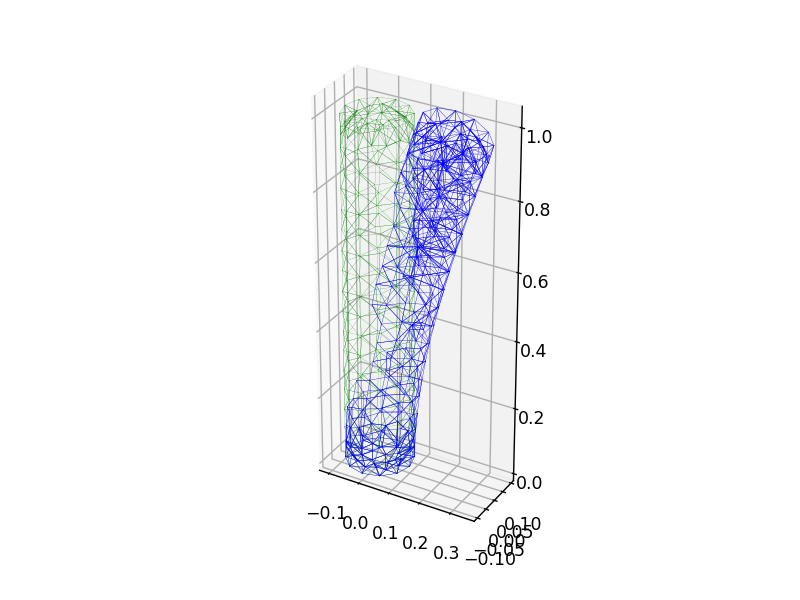

In [10]:
# Then plot the final result!
ax=plot_tri_mesh(nodes,cells,plot_nodes=False,linewidth=0.1);
plot_tri_mesh(nodes+d.reshape((len(nodes),3)),cells,plot_nodes=False,ax=ax,color='b');